In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm 

## Distribución normal teórica


$$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$$

* $\mu$: media de la distribución
* $\sigma$: desviación estándar de la distribución

In [8]:
# definimos nuestra distribución gaussiana
def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow((x-mu)/sigma,2))

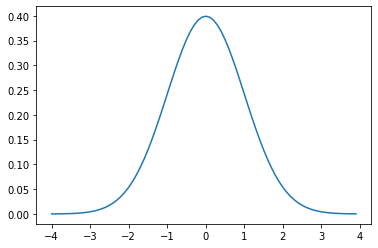

In [9]:
# Se crea una lista de datos para verificar que esta escrita
# correctamente
x = np.arange(-4, 4, 0.1)
y = gaussian(x, 0.0, 1.0)

plt.plot(x, y)

Se observa que da una gaussiana, por lo que la ecuación esta escrita correctamente, ahora se desplaza la gaussiana.

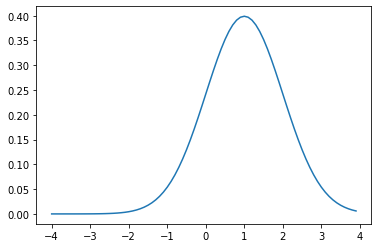

In [10]:
x = np.arange(-4, 4, 0.1)
y = gaussian(x, 1.0, 1.0)

plt.plot(x, y)

Ahora se realiza con un sigma mucho menor

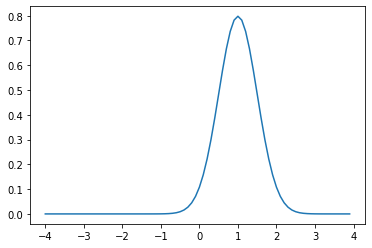

In [13]:
x = np.arange(-4, 4, 0.1)
y = gaussian(x, 1.0, 0.5)

plt.plot(x, y)

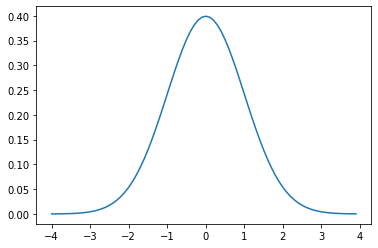

In [14]:
# usando scipy
# Se usa el modulo norm, que permite crear una distribución gaussiana,
# recibe dos parametros, el promedio o mu y la desviación o sigma
dist = norm(0, 1)
x = np.arange(-4, 4, 0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x,y)


La función norm, realiza lo mismo que lo cálculado anteriormente con la función gaussian. 

Ahora, la ecuación de la distribución normal es demasiado compleja para realizar una derivada en poco tiempo, para este caso la librería scipy nos ayuda a realizar esta acción, el cual es necesario para saber la probabilidad de la distribución acumulada.

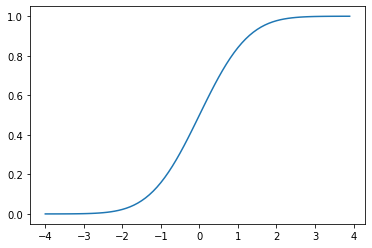

In [15]:
# calculando la distribución acumulada
dist = norm(0, 1)
x = np.arange(-4, 4, 0.1)
# cdf nos halla la distribución acumulada
y = [dist.cdf(value) for value in x]

plt.plot(x, y)

Se muestra que la distribución es correctamente realizada, ya que empieza desde 0 hasta 1. Como conclusión, la librería scipy es bastente robusta y tiene las funciones que se necesita para calcular probabilidades.

## Distribución normal (gausiana) a partir de los datos

* *El archivo excel* lo puedes descargar en esta página: https://seattlecentral.edu/qelp/sets/057/057.html

In [17]:
# Se carga el archivo de excel por medio de pandas
df = pd.read_excel('./archivos/s057.xls')
df

,Normally Distributed Housefly Wing Lengths,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Sokal, R.R., and P.E.Hunter. 1955.",NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,length (x.1mm),NaN,NaN,NaN
3,36,NaN,Bin,Frequency
4,37,NaN,36-38,2
...,...,...,...,...
98,52,NaN,NaN,NaN
99,53,NaN,NaN,NaN
100,53,NaN,NaN,NaN
101,54,NaN,NaN,NaN


Este archivo es sobre la longitud de las alas de los mosquitos, tiene 103 especies de mosquitos con sus diferentes parametros.

In [21]:
# Se selecciona la columna de interes
df = pd.read_excel('./archivos/s057.xls')
arr = df['Normally Distributed Housefly Wing Lengths'].values[4:]
arr

array([37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42,
       42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50,
       50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55],
      dtype=object)

In [22]:
# Se cuenta el numero de veces que aparece cada elemento
np.unique(arr, return_counts=True)


(array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55], dtype=object),
 array([ 1,  2,  2,  4,  6,  7,  8,  9, 10, 10,  9,  8,  7,  6,  4,  2,  2,
         1,  1]))

Como se puede observar, el primer array son los diferentes elementos y el segundo array en la cantidad de veces que aparece en el dataset. Por tanto se crean dos array en el siguiente codigo y se dibujan.

<BarContainer object of 19 artists>

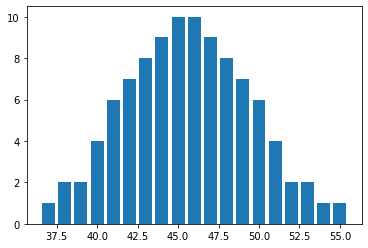

In [24]:
values, dist= np.unique(arr, return_counts=True)
plt.bar(values, dist)

A primera vista se asemeja a una distribución gaussiana, pero se comprueba de manera númerica

<BarContainer object of 19 artists>

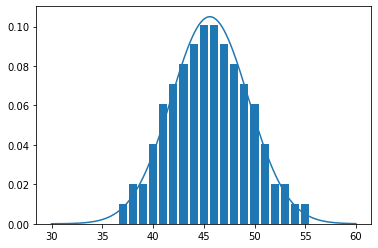

In [25]:
# estimación de la distribución de probabilidad
# Se utiliza la función mean que tiene la variable arr por ser una 
# variable de numpy
mu = arr.mean()
# Se calcula la desviación estandar
sigma = arr.std()
x = np.arange(30, 60, 0.01)
dist = norm(mu, sigma)
y = [dist.pdf(value) for value in x]
plt.plot(x, y)
values, dist= np.unique(arr, return_counts=True)
plt.bar(values, dist/len(arr))

#distribución teórica

# datos


Se puede observar que los datos se acomoda muy bien con la distribucción gaussiana. Esto muestra que hay datos de la realidad que se ajustan a las matemáticas teoricas.

Sin embargo, la distribuccion normal no es la única, existen otras distribucciones como por ejemplo

- Exponencial
- Pareto
- ...

## ENLACES EXTERNOS

[Dataset](https://seattlecentral.edu/qelp/sets/057/057.html)

[Archivo clase](https://colab.research.google.com/drive/1weFtkmxdn_WnGW582Xugj9t7Mjzxis5b?usp=sharing)

[scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)